# Low-Rank Adaptation (LoRA) for Attention Models: Intuitions and Detailed Explanation

## Abstract
Low-Rank Adaptation (LoRA) is a method for efficiently adapting large pre-trained models to specific tasks. By introducing trainable low-rank matrices into the model's layers, LoRA reduces the number of parameters that need to be fine-tuned, significantly improving computational efficiency. This paper provides a detailed explanation of LoRA, starting with intuitive insights and progressing to more technical details, including mathematical formulations.

## Introduction

As machine learning models grow larger and more complex, the challenge of fine-tuning these models for specific tasks becomes increasingly significant. Traditional methods involve updating all parameters of a pre-trained model, which is computationally expensive and time-consuming. Low-Rank Adaptation (LoRA) addresses this challenge by introducing a method that requires updating only a small subset of parameters, specifically low-rank matrices, making the fine-tuning process more efficient.

## High-Level Intuition

Imagine a giant, intricate machine designed to solve a wide range of problems. This machine has many parts, each of which can be finely adjusted to optimize performance for different tasks. Adjusting all these parts is like trying to tweak every knob on a vast control panel—it’s laborious and time-consuming.

LoRA simplifies this process by adding a few small, specialized parts to the machine. These parts are much easier to adjust and are designed to work together with the existing machine to improve its performance for a new problem. In essence, rather than modifying the entire machine, we only tweak a few new parts, which interact with the existing ones to achieve the desired outcome.

## Conceptual Framework

In the realm of attention models, key operations involve projecting input features into query, key, and value vectors using weight matrices. LoRA modifies these operations by introducing additional low-rank matrices that are trainable during the fine-tuning process. This means that instead of updating the entire weight matrices, only the low-rank matrices are updated, drastically reducing the number of parameters involved in fine-tuning.

### Attention Mechanism

Attention mechanisms are a cornerstone of modern machine learning models, particularly in natural language processing. They allow models to focus on different parts of the input sequence dynamically, thereby capturing dependencies across different positions. The main operations in an attention mechanism involve projecting the input into query ($Q$), key ($K$), and value ($V$) vectors using learned weight matrices.

### Introducing Low-Rank Matrices

The core idea of LoRA is to decompose these weight matrices into smaller, trainable low-rank matrices. This decomposition significantly reduces the number of parameters that need to be fine-tuned, making the process more efficient.

## Mathematical Formulation and Fine-Tuning Steps

To understand LoRA mathematically, consider a weight matrix $W \in \mathbb{R}^{d \times d}$ in an attention layer, where $d$ is the dimension of the model. Instead of directly fine-tuning $W$, LoRA decomposes it into two low-rank matrices $A \in \mathbb{R}^{d \times r}$ and $B \in \mathbb{R}^{r \times d}$, where $r \ll d$.

The adapted weight matrix $W_{adapted}$ is given by:

$$
W_{adapted} = W + \Delta W
$$

where

$$
\Delta W = A \times B
$$

Here, $A$ and $B$ are the low-rank matrices that are learned during the fine-tuning process. This decomposition reduces the number of parameters from $d^2$ in $W$ to $2rd$ in $A$ and $B$ combined, significantly lowering the computational cost of fine-tuning.

### Standard Fine-Tuning Steps

1. **Initialize**:
    - Start with a pre-trained weight matrix $W$ for the query, key, or value projections in the attention mechanism.
    - Dimensions: $W \in \mathbb{R}^{d \times d}$.

2. **Forward Pass**:
    - Input $X$ is transformed using the weight matrix: $XW$.
    - Compute the loss function $L$ based on the model's output and the true labels.

3. **Backward Pass**:
    - Compute the gradient of the loss with respect to the weight matrix: $\frac{\partial L}{\partial W}$.
    - Update the weight matrix using gradient descent or another optimization method: $W \leftarrow W - \eta \frac{\partial L}{\partial W}$, where $\eta$ is the learning rate.

4. **Iteration**:
    - Repeat the forward and backward passes for several epochs until convergence.

### LoRA Fine-Tuning Steps

1. **Initialize**:
    - Start with the pre-trained weight matrix $W$.
    - Initialize low-rank matrices $A \in \mathbb{R}^{d \times r}$ and $B \in \mathbb{R}^{r \times d}$ with $r \ll d$.

2. **Forward Pass**:
    - Input $X$ is transformed using the adapted weight matrix: $X(W + \Delta W)$, where $\Delta W = A \times B$.
    - Compute the loss function $L$ based on the model's output and the true labels.

3. **Backward Pass**:
    - Compute the gradient of the loss with respect to the low-rank matrices $A$ and $B$: $\frac{\partial L}{\partial A}$ and $\frac{\partial L}{\partial B}$.
    - Update the low-rank matrices using gradient descent or another optimization method:
    $$
    A \leftarrow A - \eta \frac{\partial L}{\partial A}
    $$
    $$
    B \leftarrow B - \eta \frac{\partial L}{\partial B}
    $$

4. **Iteration**:
    - Repeat the forward and backward passes for several epochs until convergence.

In both standard fine-tuning and LoRA fine-tuning, the overall goal is to minimize the loss function $L$. However, by updating only the low-rank matrices $A$ and $B$ in LoRA, the computational cost and memory usage are significantly reduced, making it a more efficient approach for adapting large models to new tasks.

### Example of LoRA Decomposition

Consider a small weight matrix $W \in \mathbb{R}^{3 \times 3}$:

$$
W = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$

In a standard fine-tuning approach, we would update all 9 parameters in $W$. However, using LoRA, we decompose $W$ into two low-rank matrices $A \in \mathbb{R}^{3 \times 2}$ and $B \in \mathbb{R}^{2 \times 3}$ (assuming rank $r = 2$):

$$
A = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
a_{31} & a_{32}
\end{pmatrix}, \quad
B = \begin{pmatrix}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23}
\end{pmatrix}
$$

The low-rank adaptation matrix $\Delta W$ is then computed as:

$$
\Delta W = A \times B
$$

Let's assume:

$$
A = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
1 & 1
\end{pmatrix}, \quad
B = \begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 1
\end{pmatrix}
$$

Then:

$$
\Delta W = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
1 & 1
\end{pmatrix} \times \begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 1
\end{pmatrix} = \begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 1 \\
1 & 3 & 2
\end{pmatrix}
$$

The adapted weight matrix $W_{adapted}$ becomes:

$$
W_{adapted} = W + \Delta W = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix} + \begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 1 \\
1 & 3 & 2
\end{pmatrix} = \begin{pmatrix}
2 & 4 & 4 \\
4 & 6 & 7 \\
8 & 11 & 11
\end{pmatrix}
$$

In this example, instead of updating 9 parameters in $W$, we only update 12 parameters in $A$ and $B$. While this particular example doesn't reduce the number of parameters due to the small matrix size, in practice, with much larger $d$, the reduction in parameters becomes significant, showcasing the efficiency of LoRA.

### Parameter Efficiency

The reduction in the number of parameters is one of the key advantages of LoRA. For instance, if $d = 1024$ and $r = 4$, the number of parameters reduces from over a million to just a few thousand. This makes fine-tuning large models much more feasible in terms of both time and computational resources.

### Impact on Model Performance

Despite the reduction in the number of parameters, LoRA maintains the model's performance by ensuring that the low-rank matrices capture the essential task-specific information. This balance between efficiency and effectiveness is what makes LoRA a powerful tool for adapting large models to new tasks.

## Detailed Explanation and Intuitions

To provide a deeper understanding of LoRA, let's delve into the detailed workings and intuitions behind this method.

### Intuition Behind Low-Rank Decomposition

The concept of low-rank decomposition is rooted in linear algebra. A matrix can often be approximated by the product of two smaller matrices. This approximation is particularly useful when the original matrix has a lot of redundancy. By focusing on the most significant features captured by the low-rank matrices, we can efficiently represent the essential information.

### Practical Example

Consider an analogy from image compression. High-resolution images contain a lot of data, but much of it is redundant. Compression techniques reduce the file size by identifying and removing this redundancy while preserving the critical information needed to reconstruct the image. Similarly, LoRA compresses the parameter space of the model by focusing on the most important features through low-rank matrices.

### Adaptation Process

When adapting a pre-trained model to a new task, the goal is to capture the unique characteristics of the new data without losing the general knowledge encoded in the original model. LoRA achieves this by injecting task-specific information through the low-rank matrices while keeping the original weight matrices intact. This approach allows the model to leverage both the general knowledge and the new, task-specific insights.

## Implementation and Practical Considerations

While this paper focuses on the conceptual and mathematical aspects of LoRA, it's important to consider practical implementation details. In practice, integrating LoRA into an existing model involves modifying the relevant layers to include the low-rank matrices and ensuring that only these matrices are updated during fine-tuning.

### Implementation Steps

1. **Identify Layers for Adaptation**: Determine which layers of the model will benefit most from low-rank adaptation. Typically, these are the layers with the largest weight matrices, such as those in the attention mechanism.

2. **Initialize Low-Rank Matrices**: Introduce the low-rank matrices $A$ and $B$ into the identified layers. These matrices should be initialized with random values or based on some heuristic.

3. **Modify Forward Pass**: Adjust the forward pass of the model to include the low-rank matrices. This involves computing the adapted weight matrix $W_{adapted}$ as described earlier.

4. **Fine-Tuning**: During the fine-tuning process, ensure that only the low-rank matrices $A$ and $B$ are updated. The original weight matrices $W$ remain fixed.

### Hyperparameter Selection

Selecting the appropriate rank $r$ for the low-rank matrices is crucial. A smaller $r$ reduces the number of parameters but may not capture enough task-specific information. Conversely, a larger $r$ increases the parameter count but may provide better performance. Empirical validation and experimentation are often necessary to find the optimal value for $r$.

## Conclusion

Low-Rank Adaptation (LoRA) offers a powerful and efficient method for fine-tuning large pre-trained models. By introducing trainable low-rank matrices into the model's layers, LoRA significantly reduces the computational resources required for fine-tuning while maintaining high performance. This balance of efficiency and effectiveness makes LoRA an attractive approach for adapting attention models to new tasks.

### Future Directions

Future research on LoRA could explore its application to other types of models and its potential integration with other fine-tuning techniques. Additionally, developing automated methods for selecting the optimal rank $r$ and further reducing computational costs could enhance the practical utility of LoRA.


# Python Code

Here is the implementation of the decomposition in Python, showing the steps and matrices with and without the decomposition.

In [1]:
import numpy as np

# Original weight matrix W
W = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print("Original Weight Matrix W:")
print(W)

# Low-rank matrices A and B
A = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])

B = np.array([
    [1, 2, 1],
    [0, 1, 1]
])

print("\nLow-Rank Matrix A:")
print(A)
print("\nLow-Rank Matrix B:")
print(B)

# Compute the low-rank adaptation matrix ΔW
Delta_W = np.dot(A, B)

print("\nLow-Rank Adaptation Matrix ΔW = A * B:")
print(Delta_W)

# Compute the adapted weight matrix W_adapted
W_adapted = W + Delta_W

print("\nAdapted Weight Matrix W_adapted = W + ΔW:")
print(W_adapted)

# Fine-tuning without LoRA (i.e., updating W directly)
# Here we simulate an update step by adding a gradient to W
gradient = np.array([
    [0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1]
])
W_updated = W + gradient

print("\nWeight Matrix after Fine-Tuning without LoRA (W_updated):")
print(W_updated)

# Fine-tuning with LoRA (i.e., updating A and B)
# Here we simulate an update step by adding gradients to A and B
gradient_A = np.array([
    [0.1, 0],
    [0, 0.1],
    [0.1, 0.1]
])
gradient_B = np.array([
    [0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1]
])
A_updated = A + gradient_A
B_updated = B + gradient_B
Delta_W_updated = np.dot(A_updated, B_updated)
W_adapted_updated = W + Delta_W_updated

print("\nUpdated Low-Rank Matrix A after Fine-Tuning:")
print(A_updated)
print("\nUpdated Low-Rank Matrix B after Fine-Tuning:")
print(B_updated)
print("\nUpdated Low-Rank Adaptation Matrix ΔW after Fine-Tuning:")
print(Delta_W_updated)
print("\nAdapted Weight Matrix after Fine-Tuning with LoRA (W_adapted_updated):")
print(W_adapted_updated)

Original Weight Matrix W:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Low-Rank Matrix A:
[[1 0]
 [0 1]
 [1 1]]

Low-Rank Matrix B:
[[1 2 1]
 [0 1 1]]

Low-Rank Adaptation Matrix ΔW = A * B:
[[1 2 1]
 [0 1 1]
 [1 3 2]]

Adapted Weight Matrix W_adapted = W + ΔW:
[[ 2  4  4]
 [ 4  6  7]
 [ 8 11 11]]

Weight Matrix after Fine-Tuning without LoRA (W_updated):
[[1.1 2.1 3.1]
 [4.1 5.1 6.1]
 [7.1 8.1 9.1]]

Updated Low-Rank Matrix A after Fine-Tuning:
[[1.1 0. ]
 [0.  1.1]
 [1.1 1.1]]

Updated Low-Rank Matrix B after Fine-Tuning:
[[1.1 2.1 1.1]
 [0.1 1.1 1.1]]

Updated Low-Rank Adaptation Matrix ΔW after Fine-Tuning:
[[1.21 2.31 1.21]
 [0.11 1.21 1.21]
 [1.32 3.52 2.42]]

Adapted Weight Matrix after Fine-Tuning with LoRA (W_adapted_updated):
[[ 2.21  4.31  4.21]
 [ 4.11  6.21  7.21]
 [ 8.32 11.52 11.42]]


### Explanation

- **Original Weight Matrix W**:
  ```python
  W = np.array([
      [1, 2, 3],
      [4, 5, 6],
      [7, 8, 9]
  ])
  ```

- **Low-Rank Matrices A and B**:
  ```python
  A = np.array([
      [1, 0],
      [0, 1],
      [1, 1]
  ])

  B = np.array([
      [1, 2, 1],
      [0, 1, 1]
  ])
  ```

- **Low-Rank Adaptation Matrix ΔW**:
  ```python
  Delta_W = np.dot(A, B)
  ```

- **Adapted Weight Matrix W_adapted**:
  ```python
  W_adapted = W + Delta_W
  ```

- **Fine-Tuning without LoRA**:
  ```python
  gradient = np.array([
      [0.1, 0.1, 0.1],
      [0.1, 0.1, 0.1],
      [0.1, 0.1, 0.1]
  ])
  W_updated = W + gradient
  ```

- **Fine-Tuning with LoRA**:
  ```python
  gradient_A = np.array([
      [0.1, 0],
      [0, 0.1],
      [0.1, 0.1]
  ])
  gradient_B = np.array([
      [0.1, 0.1, 0.1],
      [0.1, 0.1, 0.1]
  ])
  A_updated = A + gradient_A
  B_updated = B + gradient_B
  Delta_W_updated = np.dot(A_updated, B_updated)
  W_adapted_updated = W + Delta_W_updated
  ```

This example demonstrates how LoRA decomposes a weight matrix into low-rank matrices, updates these matrices during fine-tuning, and combines them to form the adapted weight matrix. This approach significantly reduces the computational cost compared to updating the entire weight matrix directly.

# Optimal rank

Determining the optimal size for the low-rank matrices in Low-Rank Adaptation (LoRA) involves selecting the rank \( r \). This decision balances model performance with computational efficiency. Here are key strategies and considerations:

### Empirical Validation
- **Experimentation**: Test different values of \( r \) and evaluate performance on a validation set.
- **Grid Search**: Conduct a grid search over a range of \( r \) values.
- **Metrics**: Use relevant performance metrics (e.g., accuracy, F1 score) to assess the model.
- **Validation**: Ensure evaluations are performed on a separate validation set to avoid overfitting.

### Model Size and Complexity
- **Large Models**: For large models, smaller \( r \) values might be sufficient due to the model's capacity.
- **Small Models**: Smaller models may require larger \( r \) values to capture sufficient task-specific information.

### Task Complexity
- **Simple Tasks**: Simpler tasks might only need a smaller \( r \).
- **Complex Tasks**: More complex tasks may benefit from a larger \( r \) to capture the task's nuances.

### Computational Resources
- **Memory Constraints**: Ensure the chosen \( r \) fits within available memory limits.
- **Training Time**: Balance training time with performance improvements when selecting \( r \).

### Theoretical Considerations
- **Rank and Information**: The rank \( r \) should be chosen based on the amount of information required to capture the task-specific details. Higher \( r \) values can represent more complex interactions.
- **Singular Value Decomposition (SVD)**: Analyzing the singular values of the original weight matrix \( W \) can help determine a suitable \( r \). Significant singular values indicate important components that should be retained.
- **Trade-offs**: Understand the trade-off between expressiveness and overfitting. Higher ranks increase expressiveness but also the risk of overfitting.

### Regularization Techniques
- **Dropout**: Use dropout to prevent overfitting, especially when using larger \( r \) values.

### Summary
The optimal rank \( r \) for the low-rank matrices in LoRA is typically determined through a combination of empirical validation, theoretical considerations, model size and task complexity, computational resource constraints, and the application of regularization techniques. This ensures an efficient balance between performance and computational cost.

# Procedure for Determining Optimal Rank \( r \)

Let's elaborate on the procedure for determining the optimal rank \( r \) for the low-rank matrices in LoRA, integrating empirical, theoretical, and practical considerations.


1. **Empirical Validation**
    - **Experimentation**: Start by experimenting with different values of \( r \) (e.g., \( r = 1, 2, 4, 8, 16 \)).
    - **Grid Search**: Perform a grid search over the chosen range of \( r \) values.
    - **Evaluation Metrics**: Use relevant performance metrics such as accuracy, F1 score, precision, recall, etc., to evaluate the model on a validation set.
    - **Validation Set**: Ensure that you are evaluating performance on a separate validation set to prevent overfitting to the training data.

2. **Model Size and Complexity**
    - **Large Models**: For large models (e.g., with millions of parameters), start with smaller \( r \) values (e.g., \( r = 1, 2, 4 \)).
    - **Small Models**: For smaller models, consider using larger \( r \) values as they may need more capacity to capture task-specific information.

3. **Task Complexity**
    - **Simple Tasks**: For tasks that are relatively simple, use smaller \( r \) values.
    - **Complex Tasks**: For more complex tasks that require capturing intricate patterns and dependencies, consider larger \( r \) values.

4. **Computational Resources**
    - **Memory Constraints**: Ensure that the selected \( r \) value fits within your available memory limits. Larger \( r \) values increase memory usage.
    - **Training Time**: Consider the impact of \( r \) on training time. Larger \( r \) values will require more time for training.

5. **Theoretical Considerations**
    - **Singular Value Decomposition (SVD)**: Analyze the singular values of the original weight matrix \( W \). The number of significant singular values can guide the choice of \( r \).
    - **Information Retention**: The rank \( r \) should capture the essential task-specific information. Higher \( r \) values can represent more complex interactions but increase the risk of overfitting.
    - **Trade-offs**: Balance the trade-off between the model's expressiveness and the risk of overfitting. 

6. **Regularization Techniques**
    - **Dropout**: Apply dropout to prevent overfitting, especially when using larger \( r \) values. Regularization helps in maintaining a balance between fitting the training data and generalizing to unseen data.

### Example Workflow

1. **Initialize Range for \( r \)**: Start with a range of potential \( r \) values, e.g., \( r \in \{1, 2, 4, 8, 16\} \).
2. **Conduct Experiments**:
    - For each \( r \) value, fine-tune the model using LoRA.
    - Record performance metrics on a validation set.
3. **Evaluate Results**:
    - Analyze the performance metrics for each \( r \).
    - Look for the \( r \) value that provides the best balance between performance and computational efficiency.
4. **Theoretical Analysis**:
    - If available, perform SVD on the original weight matrix \( W \) and analyze the singular values.
    - Use this analysis to confirm or adjust your choice of \( r \).
5. **Finalize \( r \)**: Select the optimal \( r \) based on empirical results, theoretical insights, and practical considerations.

### Example Implementation in Python

In [3]:
import numpy as np

# Example weight matrix W
W = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Function to compute SVD and suggest a rank
def suggest_rank(W, threshold=0.9):
    U, S, Vt = np.linalg.svd(W)
    total_variance = np.sum(S)
    variance_captured = 0
    for i, singular_value in enumerate(S):
        variance_captured += singular_value
        if variance_captured / total_variance >= threshold:
            return i + 1
    return len(S)

# Suggest a rank based on SVD
optimal_r = suggest_rank(W)
print(f"Suggested rank based on SVD: {optimal_r}")

# Initialize low-rank matrices A and B for the suggested rank
A = np.random.randn(W.shape[0], optimal_r)
B = np.random.randn(optimal_r, W.shape[1])

# Compute the low-rank adaptation matrix ΔW
Delta_W = np.dot(A, B)

# Compute the adapted weight matrix W_adapted
W_adapted = W + Delta_W

# Display matrices
print("Original Weight Matrix W:")
print(W)
print("\nLow-Rank Matrix A:")
print(A)
print("\nLow-Rank Matrix B:")
print(B)
print("\nLow-Rank Adaptation Matrix ΔW = A * B:")
print(Delta_W)
print("\nAdapted Weight Matrix W_adapted = W + ΔW:")
print(W_adapted)


Suggested rank based on SVD: 1
Original Weight Matrix W:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Low-Rank Matrix A:
[[-1.25733197]
 [ 1.20817786]
 [ 0.68998342]]

Low-Rank Matrix B:
[[-1.50139536 -0.63138497  0.13940678]]

Low-Rank Adaptation Matrix ΔW = A * B:
[[ 1.88775239  0.79386052 -0.1752806 ]
 [-1.81395264 -0.76282535  0.16842818]
 [-1.0359379  -0.43564516  0.09618837]]

Adapted Weight Matrix W_adapted = W + ΔW:
[[2.88775239 2.79386052 2.8247194 ]
 [2.18604736 4.23717465 6.16842818]
 [5.9640621  7.56435484 9.09618837]]


# LoRA as Graph Decomposition

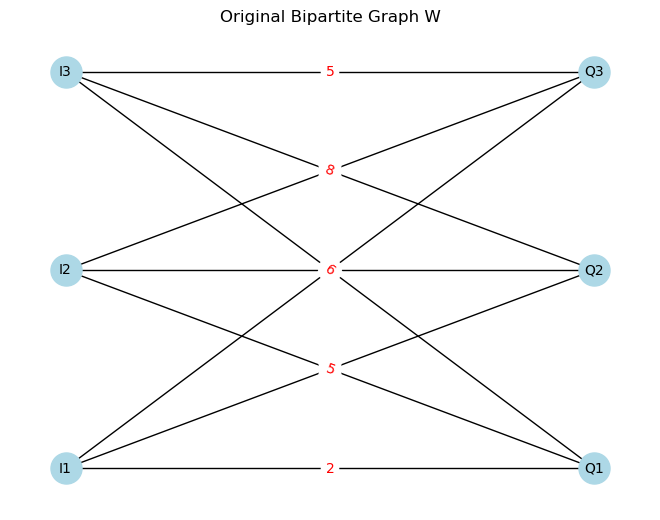

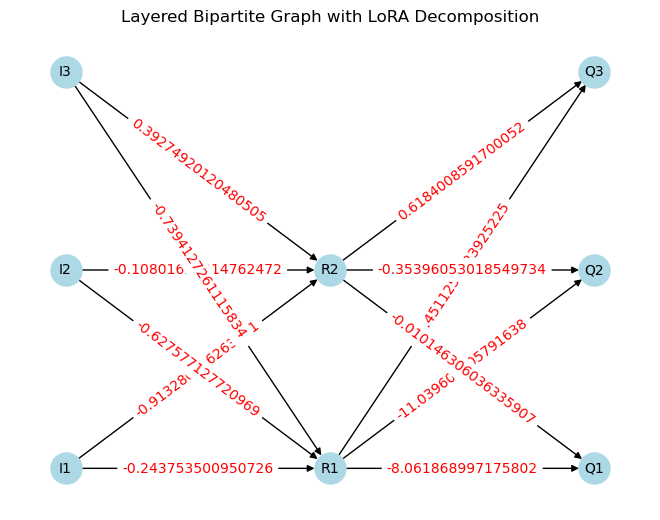

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define a new weight matrix W
W = np.array([
    [2, 3, 1],
    [5, 7, 4],
    [6, 8, 5]
])

# Perform SVD on W
U, S, Vt = np.linalg.svd(W, full_matrices=False)

# Select rank r for low-rank approximation
r = 2
U_r = U[:, :r]
S_r = np.diag(S[:r])
Vt_r = Vt[:r, :]

# Low-rank matrices A and B
A = U_r
B = np.dot(S_r, Vt_r)

# Function to draw bipartite graph
def draw_bipartite_graph(matrix, node_labels1, node_labels2, title):
    B = nx.Graph()
    B.add_nodes_from(node_labels1, bipartite=0)
    B.add_nodes_from(node_labels2, bipartite=1)
    
    # Add edges with weights
    for i, node1 in enumerate(node_labels1):
        for j, node2 in enumerate(node_labels2):
            weight = matrix[i, j]
            if weight != 0:
                B.add_edge(node1, node2, weight=weight)
    
    pos = {}
    pos.update((n, (1, i)) for i, n in enumerate(node_labels1))  # Nodes from set 1
    pos.update((n, (2, i)) for i, n in enumerate(node_labels2))  # Nodes from set 2

    edge_labels = nx.get_edge_attributes(B, 'weight')
    nx.draw(B, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Function to draw layered bipartite graph
def draw_layered_bipartite_graph(A, B, input_labels, intermediate_labels, output_labels, title):
    G = nx.DiGraph()
    
    # Add nodes
    G.add_nodes_from(input_labels, layer=0)
    G.add_nodes_from(intermediate_labels, layer=1)
    G.add_nodes_from(output_labels, layer=2)
    
    # Add edges from input to intermediate (matrix A)
    for i, node1 in enumerate(input_labels):
        for j, node2 in enumerate(intermediate_labels):
            weight = A[i, j]
            if weight != 0:
                G.add_edge(node1, node2, weight=weight)
    
    # Add edges from intermediate to output (matrix B)
    for i, node1 in enumerate(intermediate_labels):
        for j, node2 in enumerate(output_labels):
            weight = B[i, j]
            if weight != 0:
                G.add_edge(node1, node2, weight=weight)
    
    pos = {}
    pos.update((n, (1, i)) for i, n in enumerate(input_labels))        # Layer 0
    pos.update((n, (2, i)) for i, n in enumerate(intermediate_labels))  # Layer 1
    pos.update((n, (3, i)) for i, n in enumerate(output_labels))        # Layer 2

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Define node labels
input_nodes = ['I1', 'I2', 'I3']
intermediate_nodes = ['R1', 'R2']
output_nodes = ['Q1', 'Q2', 'Q3']

# Draw the original bipartite graph for W
draw_bipartite_graph(W, input_nodes, output_nodes, "Original Bipartite Graph W")

# Draw the layered bipartite graph with LoRA decomposition
draw_layered_bipartite_graph(A, B, input_nodes, intermediate_nodes, output_nodes, "Layered Bipartite Graph with LoRA Decomposition")


# Inherent properties of language and attention leading to usefulness of low-rank decomposition

There are inherent properties of language and attention mechanisms that often result in matrices that can be effectively decomposed into low-rank matrices. Here are some of the reasons:

### Inherent Properties of Language
1. **Redundancy and Structure**:
   - Natural language is highly structured and often redundant. Sentences and documents frequently contain repeated patterns, phrases, and syntactic structures, leading to correlated features.
   - This redundancy means that the information can often be captured using fewer dimensions, making the matrices representing these data amenable to low-rank approximations.

2. **Semantic Similarity**:
   - Words and phrases often exhibit semantic similarity, where different terms have similar meanings. For example, "dog" and "canine" might have similar contexts and usages.
   - This semantic similarity causes the vectors representing these terms in embeddings or attention mechanisms to be correlated, reducing the effective dimensionality.

### Inherent Properties of Attention Mechanisms
1. **Focus on Relevant Information**:
   - Attention mechanisms are designed to focus on the most relevant parts of the input sequence, leading to sparse or structured attention matrices.
   - These focus patterns can be captured with fewer parameters, allowing for low-rank approximations to be effective.

2. **Contextual Dependencies**:
   - Attention mechanisms capture contextual dependencies between words in a sequence. These dependencies are often local and structured, meaning that a few key interactions dominate the attention matrix.
   - Such dominance of key interactions can be captured by a low-rank approximation, as the primary information lies along certain dimensions.

### Mathematical Perspective
1. **Principal Component Analysis (PCA)**:
   - Techniques like PCA show that data can often be projected onto a lower-dimensional space while retaining most of the variance. This principle applies to the matrices used in language models and attention mechanisms.
   - The singular values in Singular Value Decomposition (SVD) tend to decay rapidly, indicating that a few principal components capture most of the information.

2. **Spectral Properties**:
   - Empirical studies have shown that the spectral properties (eigenvalue distribution) of matrices in deep learning models often exhibit a heavy-tail distribution, suggesting that most of the matrix's energy is concentrated in a few dimensions.
   - This allows for effective low-rank approximations as only a few singular values contribute significantly to the matrix's structure.

### Practical Evidence
1. **Empirical Success**:
   - Low-rank adaptation techniques like LoRA and matrix factorization methods have been empirically successful in reducing the number of parameters and improving computational efficiency without significant loss of performance.
   - This empirical success supports the theoretical and structural reasons mentioned above.

### Summary
The inherent properties of language, such as redundancy, structure, and semantic similarity, along with the focus patterns and contextual dependencies captured by attention mechanisms, result in matrices that can often be effectively decomposed into low-rank matrices. These properties enable low-rank approximations to capture the essential information with fewer parameters, making techniques like LoRA viable and efficient.